# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np

xy_data = np.load('/content/drive/MyDrive/Cambridge/Second Year/IB-Data-Science/Exercises/Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

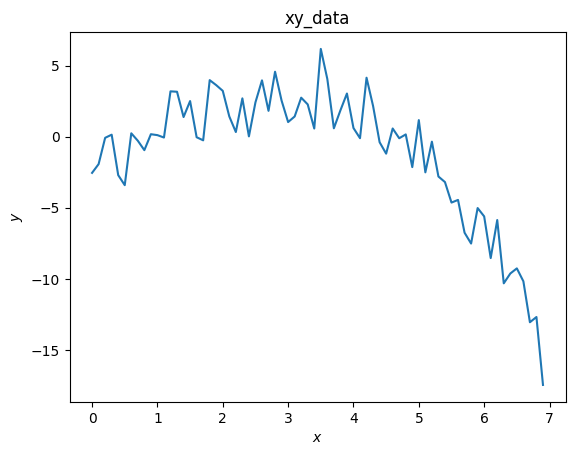

In [ ]:
import matplotlib.pyplot as plt

x_values = []
y_values = []

for i in range(70):
  x_values.append(xy_data[i][0])
  y_values.append(xy_data[i][1])

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r"xy_data")
plt.plot(x_values,y_values)
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset.
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals.

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [ ]:
def polyreg(data, k):
    # Extract x and y values from the data matrix
    x = data[:, 0]
    y = data[:, 1]
    # Create the design matrix
    A = np.column_stack([x**i for i in range(k+1)])
    # Compute coefficients using least squares regression
    beta = np.linalg.lstsq(A, y, rcond=None)[0] # Compute the fit
    fit = np.dot(A, beta) # Compute residuals
    residuals = y - fit
    return beta, fit, residuals

Use the tests below to check the outputs of the function you have written:

In [ ]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included.
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

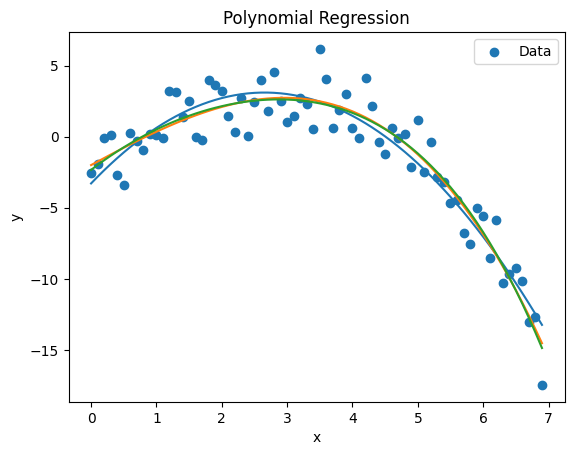

In [ ]:
#Your code here
# Degrees of polynomials to fit
degrees = [2, 3, 4]
# Plotting the scatterplot of the data
plt.scatter(x_values, y_values, label='Data')
for degree in degrees:
  coefficients, fit, residuals = polyreg(xy_data, degree)
  # compute sse
  sse = np.sum(residuals**2)
  # compute r squared
  y_mean = np.mean(y_values)
  ss_total = np.sum((y_values - y_mean)**2)
  r_squared = 1 - (sse / ss_total)
  plt.plot(x_values, fit)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()



 #### State which model you choose and briefly justify your choice.


 < fill in your answer in this cell.>

 k = 3 and 4 are similar, and it would be these models that I choose over k = 2. Typically for the best choice: R^2 is higher and SSE is lower, and so I would pick k = 4.



### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot.
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

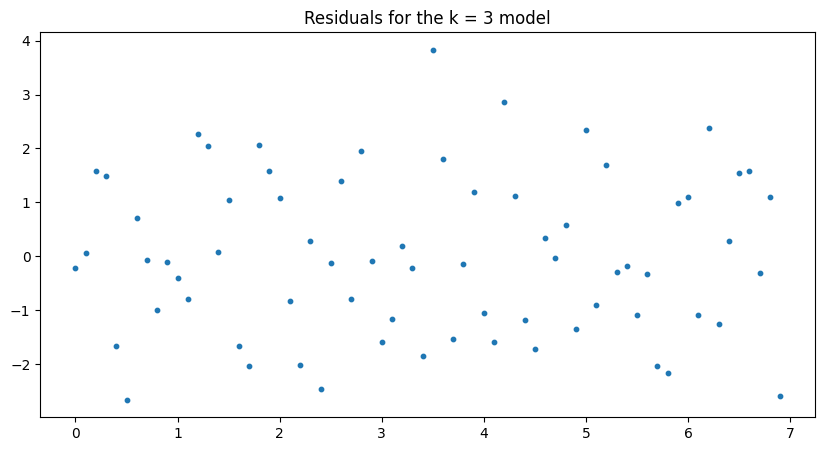

Mean of residuals for k = 3 model =  -0.0 Variance of residuals =  2.16


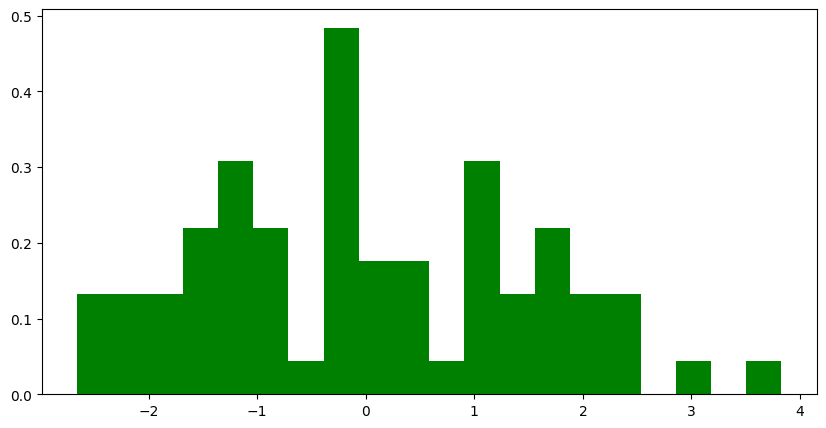

In [ ]:
#Your code here
from scipy.stats import norm
# computing the residuals
_,_,residuals = polyreg(xy_data, 4)

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x_values, residuals, s=10)
plt.title('Residuals for the k = 3 model')
plt.savefig('quad_resid.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals for k = 3 model = ', np.round(np.mean(residuals), 3), 'Variance of residuals = ', np.round(np.var(residuals),3))
# normed histogram of the residuals
n, bins, patches = plt.hist(residuals, bins=20, density=True, facecolor='green');
# Gaussian pdf with same mean and variance as the residuals residuals_stdev = np.std(residuals) #standard deviation of residuals xvals = np.linspace(-3*residuals_stdev,3*residuals_stdev,1000) plt.plot(xvals, norm.pdf(xvals, loc=0, scale=residuals_stdev), 'r') plt.show()

